<img src="https://dev.skillup.online/asset-v1:SkillUp+SKOAI101+PLU_2021_1+type@asset+block@SKO.png" width="250" align="center">

<h1 align="center"><font size="5"> Analyzing and Visualizing Covid-19 Cases</font></h1>

## Importing Libraries

In [1]:
# import libraries
import numpy as np   
import pandas as pd   
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline 

## Reading Data Set

In [2]:
# Read the data set using read_csv function

df=pd.read_csv("E:\SKillUp\Module - AI foundations\PRojects\Covid Case\Covid_19_cases.xls")

### Get glimpse of data

In [3]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31/05/2021,31,5,2021,366,5,Austria
1,30/05/2021,30,5,2021,570,6,Austria
2,29/05/2021,29,5,2021,538,11,Austria
3,28/05/2021,28,5,2021,639,4,Austria
4,27/05/2021,27,5,2021,405,19,Austria


In [4]:
df.shape

(2730, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  2730 non-null   object
 1   day                      2730 non-null   int64 
 2   month                    2730 non-null   int64 
 3   year                     2730 non-null   int64 
 4   cases                    2730 non-null   int64 
 5   deaths                   2730 non-null   int64 
 6   countriesAndTerritories  2730 non-null   object
dtypes: int64(5), object(2)
memory usage: 149.4+ KB


In [6]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories'],
      dtype='object')

In [7]:
df.describe()

,day,month,year,cases,deaths
count,2730.000000,2730.000000,2730.0,2730.000000,2730.000000
mean,16.000000,4.010989,2021.0,3661.010989,65.291941
std,8.765919,0.818813,0.0,6490.510073,113.956634
min,1.000000,3.000000,2021.0,-2001.000000,-3.000000
25%,8.000000,3.000000,2021.0,361.250000,2.000000
50%,16.000000,4.000000,2021.0,926.500000,14.500000
75%,24.000000,5.000000,2021.0,3916.250000,72.000000
max,31.000000,5.000000,2021.0,53843.000000,956.000000


In [8]:
# consider the columns 'cases', 'deaths', 'countriesAndTerritories' and prepare a new dataframe
# Write your code here
df_new = df[['cases','deaths','countriesAndTerritories']]

<details><summary>Click Here for the Hint</summary>

 

```
    df_new=df[['cases', 'deaths','countriesAndTerritories']]

 

```

 

</details>

In [9]:
# display the first 10 rows of new dataframe
df_new.head(10)

,cases,deaths,countriesAndTerritories
0,366,5,Austria
1,570,6,Austria
2,538,11,Austria
3,639,4,Austria
4,405,19,Austria
5,287,8,Austria
6,342,3,Austria
7,520,3,Austria
8,626,8,Austria
9,671,12,Austria


In [109]:
df_new.shape

(2730, 3)

### Q1. Use groupby on <code>countriesAndTerritories</code> to find total <code>cases</code> and <code>deaths</code>

In [11]:
# Write your code here
df_total = df_new.groupby('countriesAndTerritories').agg({'cases':'sum', 'deaths':'sum'})
df_total.reset_index(inplace = True)
df_total

,countriesAndTerritories,cases,deaths
0,Austria,184416,1925
1,Belgium,288119,2696
2,Bulgaria,171236,7471
3,Croatia,113168,2488
4,Cyprus,37700,129
5,Czechia,421221,9639
6,Denmark,69188,155
7,Estonia,62916,654
8,Finland,34760,177
9,France,2020808,22977


In [12]:
df_total.columns

Index(['countriesAndTerritories', 'cases', 'deaths'], dtype='object')

### Q2. Find top five countries in terms of <code>cases</code>, store them in a new dataframe and Visualize them

In [85]:
# Write your code here
df_sorted_cases = df_total.sort_values(by = 'cases', ascending = False)
df_sorted_cases

,countriesAndTerritories,cases,deaths
9,France,2020808,22977
15,Italy,1290738,28347
10,Germany,1234058,18337
23,Poland,1164964,29969
21,Netherlands,557983,2055
28,Spain,552723,10344
5,Czechia,421221,9639
29,Sweden,404019,1453
12,Hungary,371613,14675
1,Belgium,288119,2696


In [86]:
df_top_5_cases = df_sorted_cases.head(5)
df_top_5_cases

,countriesAndTerritories,cases,deaths
9,France,2020808,22977
15,Italy,1290738,28347
10,Germany,1234058,18337
23,Poland,1164964,29969
21,Netherlands,557983,2055


In [67]:
df_top_5_cases.columns

Index(['countriesAndTerritories', 'cases', 'deaths'], dtype='object')

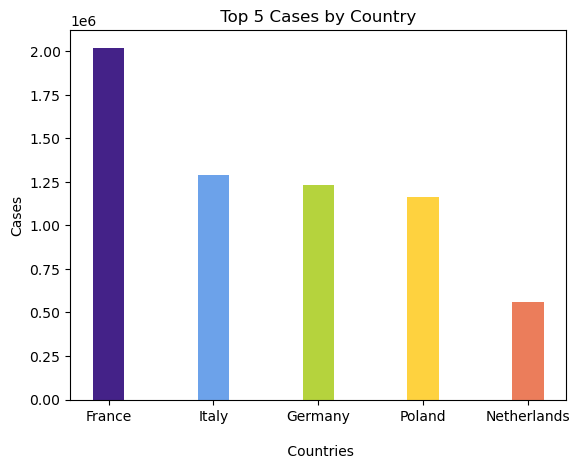

In [158]:
labels = df_top_5_cases['countriesAndTerritories']
cases = df_top_5_cases['cases']
colours = ['#442288', '#6CA2EA', '#B5D33D' , '#FED23F', '#EB7D5B']
x = np.arange(len(labels))
width = 0.3
plt.bar( x, cases, width, color = colours)
plt.xticks(x,labels)
plt.xlabel('\n Countries')
plt.ylabel('Cases')
plt.title(' Top 5 Cases by Country ')

plt.show()

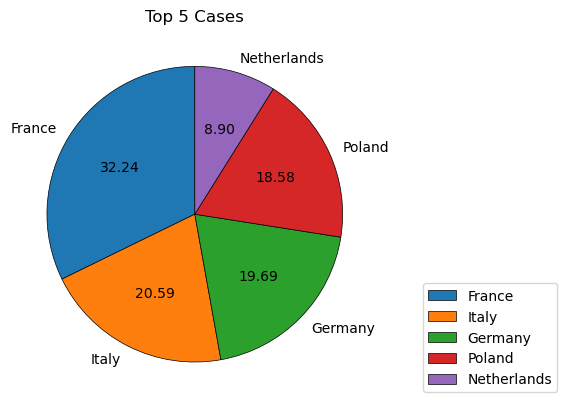

In [141]:
plt.pie(x = df_top_5_cases['cases'], labels = df_top_5_cases['countriesAndTerritories'], autopct = '%.2f', startangle = 90, wedgeprops={'edgecolor':'black', 'linewidth':0.5})
plt.title('Top 5 Cases')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.5,0))
plt.show()

<details><summary>Click Here for the Hint</summary>

 

```
    df_top_five_cases=df_cases.sort_values(by='cases',ascending=False)
    df_top_five_cases=df_top_five_cases.head(5)
    df_top_five_cases.reset_index(inplace=True)
    print(df_top_five_cases)
    sns.barplot(x='countriesAndTerritories',y='cases',data=df_top_five_cases)

 

```

 

</details>

### Q3. Find top five countries in terms of <code>deaths</code>, store them in a new dataframe and Visualize them

In [88]:
# Write your code here
df_sorted_deaths = df_total.sort_values(by = 'deaths', ascending = False)
df_sorted_deaths

,countriesAndTerritories,cases,deaths
23,Poland,1164964,29969
15,Italy,1290738,28347
9,France,2020808,22977
10,Germany,1234058,18337
12,Hungary,371613,14675
28,Spain,552723,10344
25,Romania,275590,9926
5,Czechia,421221,9639
2,Bulgaria,171236,7471
11,Greece,210201,5550


In [89]:
df_sorted_deaths.columns

Index(['countriesAndTerritories', 'cases', 'deaths'], dtype='object')

In [90]:
df_top_5_deaths = df_sorted_deaths.head(5)
df_top_5_deaths

,countriesAndTerritories,cases,deaths
23,Poland,1164964,29969
15,Italy,1290738,28347
9,France,2020808,22977
10,Germany,1234058,18337
12,Hungary,371613,14675


In [91]:
df_top_5_deaths.columns

Index(['countriesAndTerritories', 'cases', 'deaths'], dtype='object')

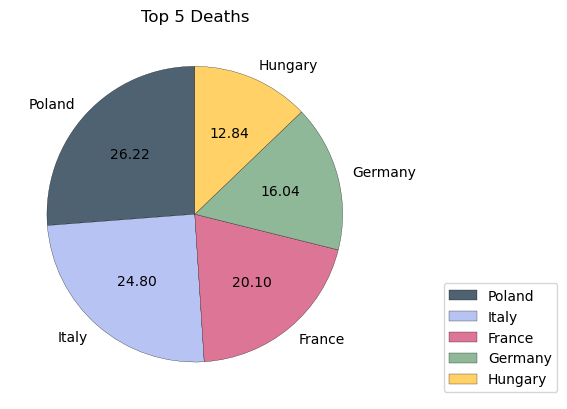

In [162]:
#Did two types of plots - Pie and Bar Plots
color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFD166']
plt.pie(x = df_top_5_deaths['deaths'], labels = df_top_5_deaths['countriesAndTerritories'], autopct = '%.2f', colors = color, startangle = 90, wedgeprops={'edgecolor':'black', 'linewidth': 0.2})
plt.title('Top 5 Deaths')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.5,0))
plt.show()

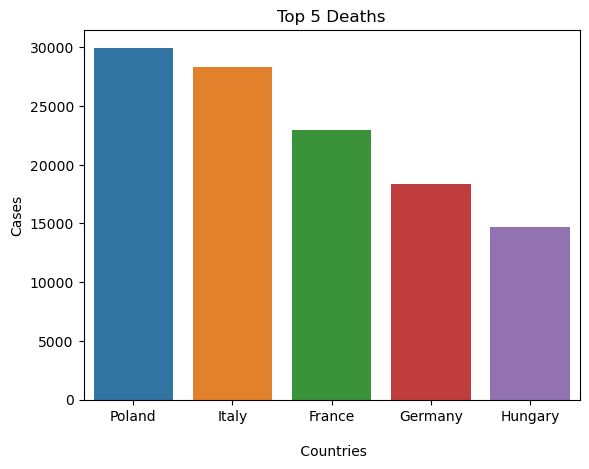

In [161]:
sns.barplot(x='countriesAndTerritories',y='deaths',data=df_top_5_deaths).set_title('Top 5 Deaths')
plt.xlabel('\n Countries')
plt.ylabel('Cases')
plt.show()

### Q4. Use groupby on <code>countriesAndTerritories</code> to find mean value of <code>cases</code> and <code>deaths</code>

In [107]:
# Write your code here
df_mean = df_new.groupby('countriesAndTerritories').agg({'cases':'mean', 'deaths':'mean'})
df_mean.reset_index(inplace = True)
df_mean

,countriesAndTerritories,cases,deaths
0,Austria,2026.549451,21.153846
1,Belgium,3166.142857,29.626374
2,Bulgaria,1881.714286,82.098901
3,Croatia,1243.604396,27.340659
4,Cyprus,414.285714,1.417582
5,Czechia,4628.802198,105.923077
6,Denmark,760.307692,1.703297
7,Estonia,691.384615,7.186813
8,Finland,381.978022,1.945055
9,France,22206.681319,252.494505


In [108]:
df_mean.columns

Index(['countriesAndTerritories', 'cases', 'deaths'], dtype='object')

### Q5. Find top five countries with highest number of average <code>cases</code>, store them in a new dataframe and Visualize them

In [111]:
# Write your code here
df_sorted_cases_avg = df_mean.sort_values(by ='cases', ascending = False) 
df_sorted_cases_avg

,countriesAndTerritories,cases,deaths
9,France,22206.681319,252.494505
15,Italy,14183.934066,311.505495
10,Germany,13561.076923,201.505495
23,Poland,12801.802198,329.329670
21,Netherlands,6131.681319,22.582418
28,Spain,6073.879121,113.670330
5,Czechia,4628.802198,105.923077
29,Sweden,4439.769231,15.967033
12,Hungary,4083.659341,161.263736
1,Belgium,3166.142857,29.626374


In [112]:
df_sorted_cases_avg.columns

Index(['countriesAndTerritories', 'cases', 'deaths'], dtype='object')

In [113]:
df_top_5_cases_avg = df_sorted_cases_avg.head(5)
df_top_5_cases_avg

,countriesAndTerritories,cases,deaths
9,France,22206.681319,252.494505
15,Italy,14183.934066,311.505495
10,Germany,13561.076923,201.505495
23,Poland,12801.802198,329.329670
21,Netherlands,6131.681319,22.582418


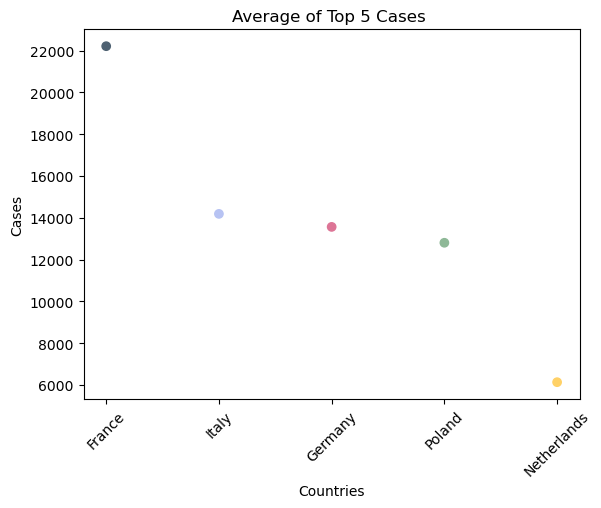

In [163]:
#Did two types of plots - Scatter and Pie plots
plt.scatter(x=df_top_5_cases_avg['countriesAndTerritories'], y=df_top_5_cases_avg['cases'], c=['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFD166'])

plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('Average of Top 5 Cases ')
plt.xticks(rotation=45)

plt.show()

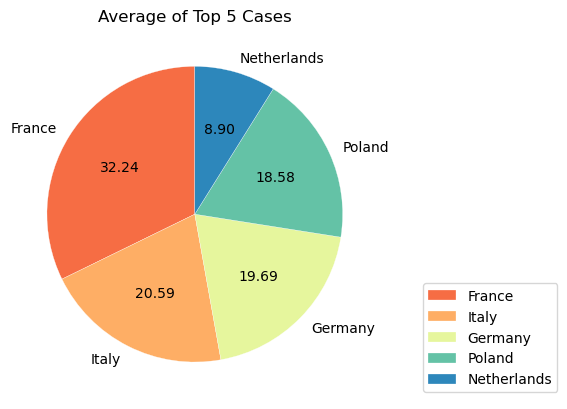

In [164]:
color = ['#F66D44', '#FEAE65','#E6F69D','#64C2A6','#2D87BB']
plt.pie(x = df_top_5_cases_avg['cases'], labels = df_top_5_cases_avg['countriesAndTerritories'], autopct = '%.2f', startangle = 90, colors = color, wedgeprops={'edgecolor':'white', 'linewidth':0.2})
plt.title('Average of Top 5 Cases')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.5,0))
plt.show()

### Q6. Find top five countries with highest number of average <code>deaths</code>, store them in a new dataframe and Visualize them

In [ ]:
# Write your code here

In [142]:
df_sorted_deaths_avg = df_mean.sort_values(by ='deaths', ascending = False) 
df_sorted_deaths_avg

,countriesAndTerritories,cases,deaths
23,Poland,12801.802198,329.329670
15,Italy,14183.934066,311.505495
9,France,22206.681319,252.494505
10,Germany,13561.076923,201.505495
12,Hungary,4083.659341,161.263736
28,Spain,6073.879121,113.670330
25,Romania,3028.461538,109.076923
5,Czechia,4628.802198,105.923077
2,Bulgaria,1881.714286,82.098901
11,Greece,2309.901099,60.989011


In [145]:
df_top_5_deaths_avg = df_sorted_deaths_avg.head(5)
df_top_5_deaths_avg

,countriesAndTerritories,cases,deaths
23,Poland,12801.802198,329.329670
15,Italy,14183.934066,311.505495
9,France,22206.681319,252.494505
10,Germany,13561.076923,201.505495
12,Hungary,4083.659341,161.263736


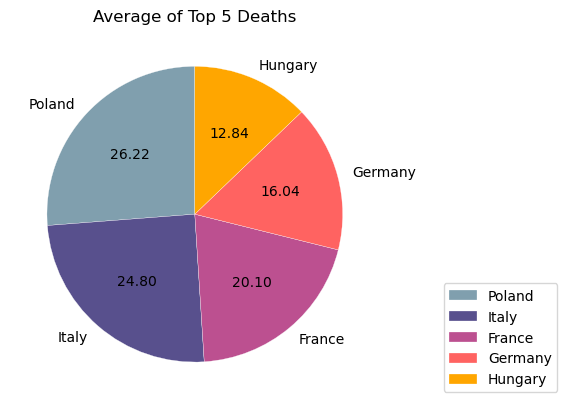

In [165]:
#Did two types of plots - Bar and Pie plots
color = ['#809FAE', '#58508D','#BC5090','#FF6361','#FFA600']
plt.pie(x = df_top_5_deaths_avg['deaths'], labels = df_top_5_deaths_avg['countriesAndTerritories'], autopct = '%.2f', startangle = 90, colors = color, wedgeprops={'edgecolor':'white', 'linewidth':0.2})
plt.title('Average of Top 5 Deaths')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.5,0))
plt.show()

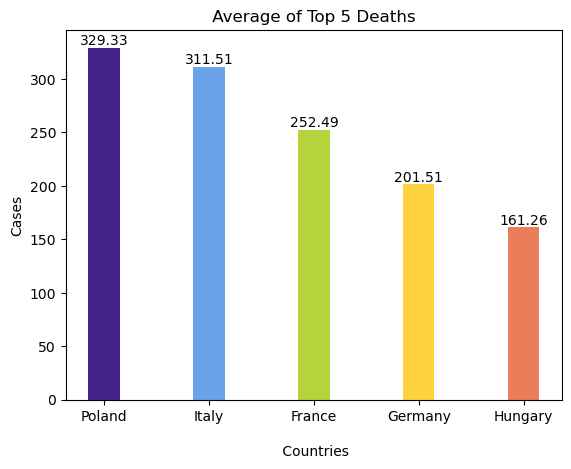

In [153]:
labels = df_top_5_deaths_avg['countriesAndTerritories']
deaths = df_top_5_deaths_avg['deaths']
colours = ['#442288', '#6CA2EA', '#B5D33D' , '#FED23F', '#EB7D5B']
x = np.arange(len(labels))
width = 0.3
plt.bar( x, deaths, width, color = colours)
plt.xticks(x,labels)
plt.xlabel('\n Countries')
plt.ylabel('Cases')
plt.title(' Average of Top 5 Deaths ')

for i, death in enumerate(deaths):
    plt.text(x[i], death, f'{death:.2f}', ha='center', va='bottom')
    
plt.show()

## Assignment Notebook Submission 

Once you complete your notebook you will have to share it. Save all your work and download the file. You will be submitting your notebook for peer review in the next section of the course.



## Author(s)

Aditya Singh

## Changelog
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2021-07-09 | 1.0 | Aditya | Created new version |
|   |   |   |   |
